# **Eye Cancer Patients  Jupyter Notebook**

**Section**: S20 <br>

**Group**: pandas Salle

# **Dataset Description**

The chosen data set titled "Eye Cancer Patient Records" provides detailed medical records for 5,000 patients diagnosed with 3 different types of eye cancer namely, Melanoma, Retinoblastoma, and Lymphoma. The dataset was retrieved from Kaggle and is designed for machine learning projects, statistical modeling, and healthcare research.


### **Import the necessary libraries**

For Data Visualization and Data processing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Initializing the DataFrame**

Load the Eye Cancer Patients Dataset into a pandas DataFrame


In [3]:
eye_cancer_df = pd.read_csv('eye_cancer_patients.csv')
eye_cancer_df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


### **Preparing to Clean up the Data**

Check the information regarding the Dataset


In [4]:
eye_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

#### **Data preprocessing**
We will want to remove the `nan` values so that when we do Exploratory Data Analysis later, we will not encounter isues<br>
First let us check if we missed any variables with a `nan` value

In [5]:
nan_variables = eye_cancer_df.columns[eye_cancer_df.isnull().any()].to_list()
print(nan_variables)

['Genetic_Markers']


> For this dataset, it seems like `Genetic_Markers` is the only variable that has a `nan` value, so we may proceed with the cleaning up of the data.

#### **Do we drop or replace the** `nan` **values from** `Genetic_Markers` **variable?**
Dropping the rows with `nan` values in `Genetic_Markers` would be more convenient, but first let us check if we still have sufficient data if ever we drop them<br>
So our task is to count how many of the rows are affected by the `nan` values.

In [6]:
nan_count = eye_cancer_df['Genetic_Markers'].isnull().sum()

print("The count of NaN values in Genetic_Markers is:", nan_count)

The count of NaN values in Genetic_Markers is: 2497


> Let us check the shape of our pandas DataFrame: `eye_cancer_df` 

In [7]:
eye_cancer_df.shape
print("Our Data frame has {} rows and {} columns.".format(eye_cancer_df.shape[0], eye_cancer_df.shape[1]))

Our Data frame has 5000 rows and 16 columns.


> We know we have 5000 observations, and according to the count of our `nan` values in the `Genetic_Markers` variable, 2497 rows are affected by these `nan` values. <br> <br>
> Therefore, we cannot proceed with the dropping since it will affect about half of our observations. <br> <br>
> Instead let us, replace these `nan` values with another categorical data as `None`.

In [8]:
eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'].isnull(), 'Genetic_Markers'] = 'None'

#### ⚠️ **Sanity Check !!**
Let us see if the `nan` values in the `Genetic_Markers` variables have been replace with `None`

In [9]:
replaced = eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'] == 'None', 'Genetic_Markers'].shape[0]
not_replaced = eye_cancer_df['Genetic_Markers'].isnull().sum()
print("The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: {} rows".format(replaced))
print("Meanwhile the number of rows that are still containg nan values is: {} rows".format(not_replaced))

The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: 2497 rows
Meanwhile the number of rows that are still containg nan values is: 0 rows


The `2497` rows that has been successfully replaced with `None` in the `Genetic_Markers` variable is parallel with the number of rows that was originally `nan` values in `Genetic_Markers`

#### **Next let's check if there are duplicate values in our categorical data**
To do this we can loop over the columns of our pandas DataFrame and then check the Unique Values

In [10]:
for col in eye_cancer_df.columns:
    if eye_cancer_df[col].dtype == 'object' and col != 'Date_of_Diagnosis' and col != 'Patient_ID':
        print(f"Unique values in {col}: {eye_cancer_df[col].unique()}")
        print()

Unique values in Gender: ['F' 'Other' 'M']

Unique values in Cancer_Type: ['Retinoblastoma' 'Melanoma' 'Lymphoma']

Unique values in Laterality: ['Left' 'Right' 'Bilateral']

Unique values in Stage_at_Diagnosis: ['Stage IV' 'Stage III' 'Stage II' 'Stage I']

Unique values in Treatment_Type: ['Radiation' 'Chemotherapy' 'Surgery']

Unique values in Outcome_Status: ['Deceased' 'In Remission' 'Active']

Unique values in Genetic_Markers: ['None' 'BRAF Mutation']

Unique values in Country: ['UK' 'Japan' 'Canada' 'USA' 'Australia' 'Germany' 'South Africa' 'Brazil'
 'France' 'India']



> Since there are no duplicate values

#### **Central Tendency Choice**

Since we plan to analyze survival time using binned intervals of 3 months,
the mode is the most appropriate measure of central tendency.

To support our claim on the usage of mode, let us check the mean, median, and mode  with respect to survival time<br>
for each of the variables we plan to explore: Cancer Type, Laterality, and Genetic Markers.

In [167]:
summary = eye_cancer_df.groupby('Cancer_Type')['Survival_Time_Months'].agg(Mean='mean', Median='median')

cancer_type_mode_bins = {}
for cancer_type in eye_cancer_df['Cancer_Type'].unique():
    cancer_type_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == cancer_type]
    mode_bin = cancer_type_df['Survival_Quantile'].mode()[0]
    cancer_type_mode_bins[cancer_type] = mode_bin

mode_series = pd.Series(cancer_type_mode_bins)
summary['Mode Bin'] = mode_series

print(summary)

                     Mean  Median    Mode Bin
Cancer_Type                                  
Lymphoma        60.373855    58.0    [55, 58)
Melanoma        60.998226    61.0  [112, 115)
Retinoblastoma  60.765550    61.0    [70, 73)


In [168]:
summary = eye_cancer_df.groupby('Laterality')['Survival_Time_Months'].agg(Mean='mean', Median='median')

laterality_mode_bins = {}
for laterality in eye_cancer_df['Laterality'].unique():
    laterality_df = eye_cancer_df[eye_cancer_df['Laterality'] == laterality]
    mode_bin = laterality_df['Survival_Quantile'].mode()[0]
    laterality_mode_bins[laterality] = mode_bin

mode_series = pd.Series(laterality_mode_bins)
summary['Mode Bin'] = mode_series

print(summary)

                 Mean  Median  Mode Bin
Laterality                             
Bilateral   59.837168    59.0  [34, 37)
Left        60.498221    60.0   [7, 10)
Right       61.862878    63.0  [40, 43)


In [169]:
summary = eye_cancer_df.groupby('Genetic_Markers')['Survival_Time_Months'].agg(Mean='mean', Median='median')

genetic_marker_mode_bins = {}
for genetic_marker in eye_cancer_df['Genetic_Markers'].unique():
    genetic_marker_df = eye_cancer_df[eye_cancer_df['Genetic_Markers'] == genetic_marker]
    mode_bin = genetic_marker_df['Survival_Quantile'].mode()[0]
    genetic_marker_mode_bins[genetic_marker] = mode_bin

mode_series = pd.Series(genetic_marker_mode_bins)
summary['Mode Bin'] = mode_series

print(summary)

                      Mean  Median    Mode Bin
Genetic_Markers                               
BRAF Mutation    60.446664    60.0  [118, 121)
None             60.985983    61.0    [85, 88)


In [150]:
summary = eye_cancer_df.groupby('Genetic_Markers')['Survival_Time_Months'].agg(
    Mean='mean',
    Median='median',
    StdDev='std'
)

# Optional: Add mode separately if you're using pd.cut
mode_bins = eye_cancer_df.groupby('Genetic_Markers')['Survival_Quantile'].agg(lambda x: x.mode()[0])
summary['Mode_Bin'] = mode_bins

print(summary)

                      Mean  Median    StdDev    Mode_Bin
Genetic_Markers                                         
BRAF Mutation    60.446664    60.0  34.72954  [118, 121)
None             60.985983    61.0  34.37347    [85, 88)


From the summaries, we can see that the mean and median of all variable types are very similar.<br>
Because of this, these measures do not highlight the variablility of the different groups.<br>
Therefore, we chose to use the mode on binned values to better reveal the central tendencies of each
variable.


#### **EDA Question 1: How does survival time vary by cancer type?**

To visualize if survival time varies with the cancer type, let's use a histogram plot. <br>
First, let us bin the Survival Time in Months so that it would be easier to interpret.

In [137]:
# Bin into 41 baskets the Survival Times
bins = np.arange(1, 122, 3)
eye_cancer_df['Survival_Quantile'] = pd.cut(eye_cancer_df['Survival_Time_Months'], bins=bins, right=False, include_lowest=True)

# View the New Binned Series in ascending order (From 0 Months to 120 Months)
eye_cancer_df[['Survival_Quantile', 'Survival_Time_Months']]
eye_cancer_df['Survival_Quantile'].value_counts().sort_index()

Survival_Quantile
[1, 4)        113
[4, 7)        123
[7, 10)       135
[10, 13)      134
[13, 16)      116
[16, 19)      126
[19, 22)      113
[22, 25)      117
[25, 28)      115
[28, 31)      125
[31, 34)      114
[34, 37)      146
[37, 40)      109
[40, 43)      125
[43, 46)      128
[46, 49)      133
[49, 52)      152
[52, 55)      144
[55, 58)      139
[58, 61)      103
[61, 64)      114
[64, 67)      127
[67, 70)      111
[70, 73)      141
[73, 76)      132
[76, 79)      118
[79, 82)      120
[82, 85)      122
[85, 88)      143
[88, 91)      122
[91, 94)      110
[94, 97)      123
[97, 100)     120
[100, 103)    129
[103, 106)    117
[106, 109)    125
[109, 112)    133
[112, 115)    128
[115, 118)    109
[118, 121)    146
Name: count, dtype: int64

> Display the `Mode` of the Survival Time in Months of the all the Eye Cancer Patients in our Sample

In [12]:
print("The Mode of the Survival Time in Months bin is: {} with a count of {} patients".format(eye_cancer_df['Survival_Quantile'].mode()[0], eye_cancer_df['Survival_Quantile'].value_counts().sort_index().max()))

The Mode of the Survival Time in Months bin is: (48.0, 51.0] with a count of 152 patients


Visualize the Data with a `Histogram` plot

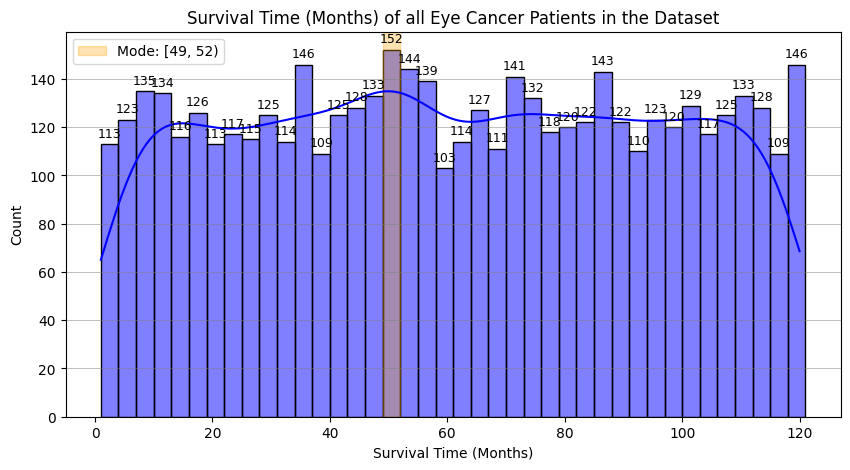

In [142]:
mode_interval = eye_cancer_df['Survival_Quantile'].mode()[0]

plt.figure(figsize=(10, 5))
ax = sns.histplot(data=eye_cancer_df, x='Survival_Time_Months', bins=bins, kde=True, color='blue')
plt.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

# Highlight the mode interval
plt.axvspan(mode_interval.left, mode_interval.right, color='orange', alpha=0.3, label=f'Mode: {mode_interval}')


for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)
    ax.bar_label

plt.title('Survival Time (Months) of all Eye Cancer Patients in the Dataset')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Count')
plt.legend()
plt.show()

**Let's take a look at the Mode of Survival Time in Months for each Cancer Type (**`Lymphoma`, `Melanoma`, `Retinoblastoma`**)**

In [134]:
eye_cancer_df.groupby('Cancer_Type')['Survival_Quantile'].describe()

,count,unique,top,freq
Cancer_Type,,,,
Lymphoma,1637,40,"[55, 58)",58
Melanoma,1691,40,"[112, 115)",54
Retinoblastoma,1672,40,"[70, 73)",59


> In the Description of the Dataframe above, each summary is grouped by the Cancer Type <br>
> and it seems that for each Cancer Type, patients have a different 'average' interval for Survival Time in Months 

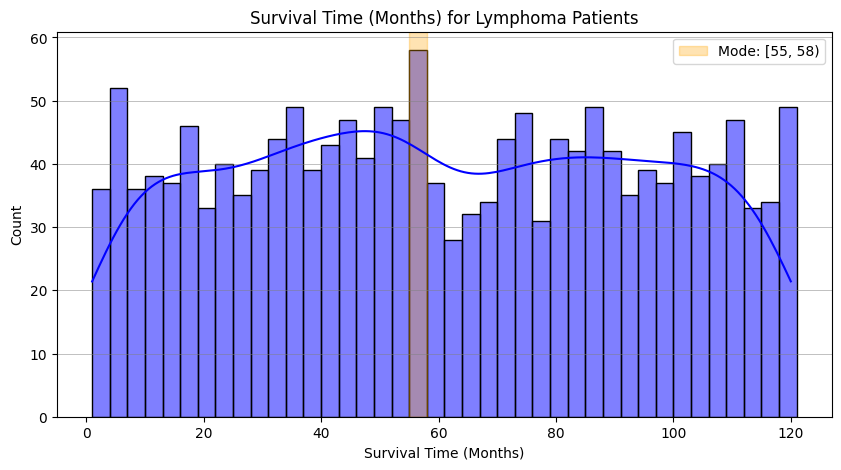

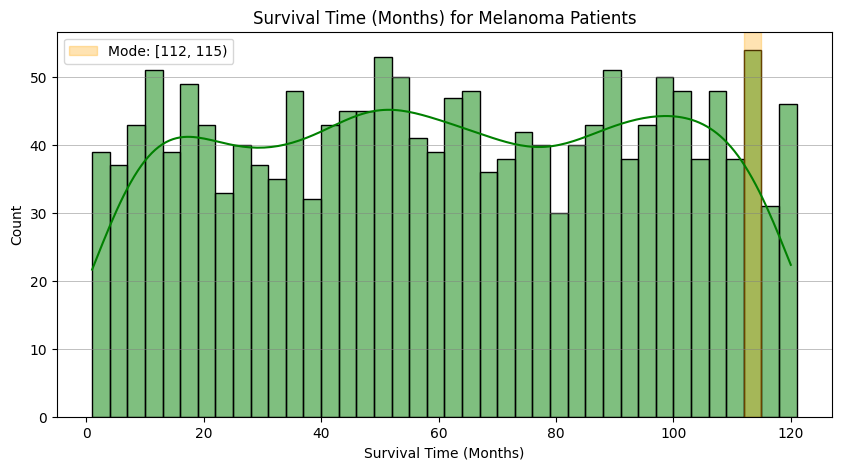

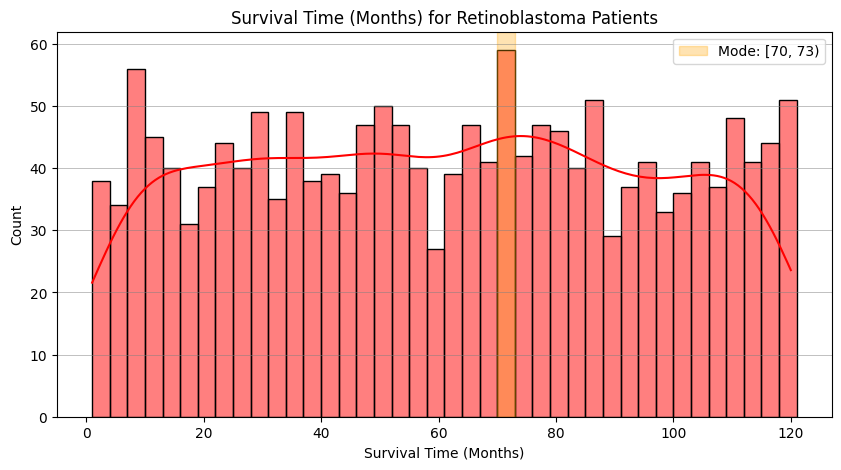

In [140]:
# Plot for Lymphoma patients' Survival Time
lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
lymphoma_mode = lymphoma_df['Survival_Quantile'].mode()[0]
plt.figure(figsize=(10, 5))
sns.histplot(data=lymphoma_df, x='Survival_Time_Months', bins=bins, kde=True, color='blue')
plt.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

# Highlight the mode interval
plt.axvspan(lymphoma_mode.left, lymphoma_mode.right, color='orange', alpha=0.3, label=f'Mode: {lymphoma_mode}')

plt.title('Survival Time (Months) for Lymphoma Patients')
plt.xlabel('Survival Time (Months)')
plt.legend()
plt.show()

# Plot for Melanoma patients' Survival Time
melanoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Melanoma']
melanoma_mode = melanoma_df['Survival_Quantile'].mode()[0]
plt.figure(figsize=(10, 5))
sns.histplot(data=melanoma_df, x='Survival_Time_Months', bins=bins, kde=True, color='green')
plt.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

plt.axvspan(melanoma_mode.left, melanoma_mode.right, color='orange', alpha=0.3, label=f'Mode: {melanoma_mode}')

plt.title('Survival Time (Months) for Melanoma Patients')
plt.xlabel('Survival Time (Months)')
plt.legend()
plt.show()


# Plot for Retinoblastoma patients' Survival Time
retinoblastoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Retinoblastoma']
retinoblastoma_mode = retinoblastoma_df['Survival_Quantile'].mode()[0]
plt.figure(figsize=(10, 5)) 
sns.histplot(data=retinoblastoma_df, x='Survival_Time_Months', bins=bins, kde=True, color='red')
plt.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

plt.axvspan(retinoblastoma_mode.left, retinoblastoma_mode.right, color='orange', alpha=0.3, label=f'Mode: {retinoblastoma_mode}')

plt.title('Survival Time (Months) for Retinoblastoma Patients')
plt.xlabel('Survival Time (Months)')
plt.legend()
plt.show()

From the graph and table, we can see that the survival time in months of each cancer type is varies to one another. This suggests that the certain eye cancer types are harder to treat than others.

#### **EDA Question 2: How does survival time vary between patients with and without the BRAF mutation**


In [16]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Genetic_Mark', figsize=(10, 6))
plt.title('Survival Time in Months by Cancer Type')
plt.suptitle('')
plt.xlabel('Cancer Type')
plt.ylabel('Survival Time in Months')
plt.show()

KeyError: 'Genetic_Mark'

In [ ]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Stage', figsize=(10, 6))


In [ ]:
eye_cancer_df['Cancer_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Cancer_Type
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
